# Making effective plots in Python
### Union College CHM 352

Adapted from materials from Wellesley College Physics Department.

Original Authors: Jerome Fung (jfung2@wellesley.edu) and Lauri Wardell (lwardell@wellesley.edu). Modifications by James Battat (jbattat@wellesley.edu), Hope Anderson (handers5), and Dagm Assefa (dassefa).

These tutorials are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.



## Tufte reading
Begin by reading the excert from Edward Tufte's "The Visual Display of Quantitative Information".

### Exercise

1. Why is it a good idea to present data in a figure even if you have reported the same data in a table?

2. According to Tufte, why are gridlines almost never beneficial to a data plot?

Other tutorials in this series show you how to make plots in Python, and even how to customize those plots. Here we show you some best-practices for making plots that communicate your data in a powerful/effective way.
We'll start with the bad, and then show you the good.  We'll also cover some more technical topics like how to add LaTeX-formatted equations to your plots.

In [ ]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 
%matplotlib inline

# Our dataset
We start by generating some data that we'll be visualizing.

In [ ]:
x  = np.arange(0, 10, 0.5)  # generate dummy data
y  = x**2
y += np.random.normal(loc=0, scale=3, size=x.size)  # add in gaussian noise

## First, the bad
The default plot parameters in matplotlib are not actually **that** terrible.

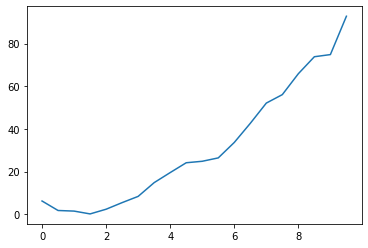

In [ ]:
plt.plot(x, y)

## Getting better ...
Always ask yourself if color is really needed.  If there is a single dataset, the answer is generally, 'no'!  Black and white is often best.  Also, axes **must** be labeled (with units).  Data should be shown as points, saving lines for theoretical models or fits to the data.

Text(0, 0.5, 'Spring potential energy [J]')

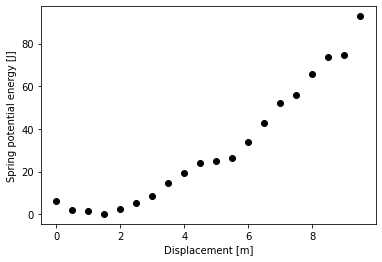

In [ ]:
plt.plot(x, y, 'ko')  # plot with blac[k] filled circles [o]
plt.xlabel('Displacement [m]')
plt.ylabel('Spring potential energy [J]')

## Better still ...
OK, we're getting somewhere.  But the axes labels and tick labels are quite small and hard to read. Also, notice that some of the points are rammed up against the edge of the plot.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text major ticklabel objects>)

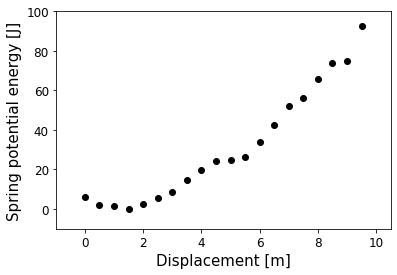

In [ ]:
plt.plot(x, y, 'ko')  # plot with blac[k] filled circles [o]
fs = 15 # axis label font size
fs_ticks = 12 # tick label font size
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)

## Quite good ...
Let's now fit a quadratic model to the data, and add a legend

       2
1.051 x - 0.6744 x + 2.136


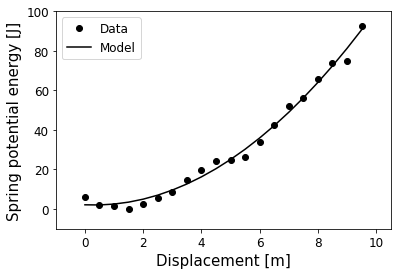

In [ ]:
pfit = np.poly1d(np.polyfit(x, y, 2))

plt.plot(x, y, 'ko', label="Data")  # plot with blac[k] filled circles [o]
plt.plot(x, pfit(x), 'k-', label="Model")
fs = 15 # font size
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)
plt.legend(loc="upper left",fontsize=fs_ticks)
print(pfit)

## Icing on the cake
We can overlay the analytic expression for the best-fit function on the plot.  Also, notice that we can use LaTeX syntax by enclosing our label in dollar signs.

       2
1.051 x - 0.6744 x + 2.136


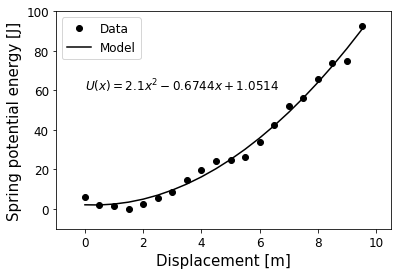

In [ ]:
label = "$U(x) = %4.1fx^2 %+6.4f x %+6.4f$" % (pfit[0], pfit[1], pfit[2])
plt.plot(x, y, 'ko', label="Data")  # plot with blac[k] filled circles [o]
plt.plot(x, pfit(x), 'k-', label="Model")
plt.text(0, 60, label, fontsize=fs_ticks)
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])
plt.xticks(fontsize=fs_ticks)
plt.yticks(fontsize=fs_ticks)
plt.legend(loc="upper left",fontsize=fs_ticks)
print(pfit)

##Subplots
Another useful feature to know about is subplots. Sometimes it makes a lot of sense to plot two related trends within the same figure, rather than have two larger single figures. The basics all apply to subplots in the same way as normal plots.

In [ ]:
# generate an array from 0 to 5 in steps of 0.1
# e.g. [0, 0.1, 0.2, ...]
x = np.arange(0.0, 5.0, 0.1)

plt.figure(1)  # Make a figure that will hold plots

plt.subplot(2,1,1)  # Tell python you want a subplot 2 vertical, 1 horizontal
plt.plot(x, 5*x, 'bo')
plt.ylabel("y-axis 1")

plt.subplot(2,1,2)  # And a second subplot
plt.plot(x, x**2, 'r-')
plt.ylabel("y-axis 2")
plt.xlabel("x-axis")

###Exercise

Starting from the code snippet below, try to reproduce the following figure:
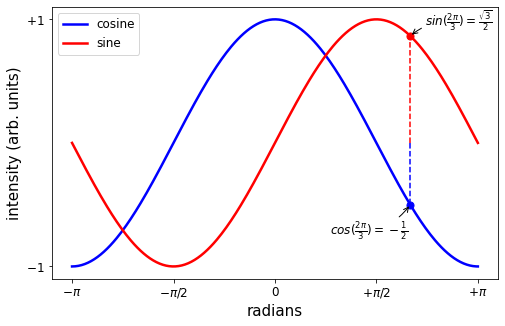

You may have to venture into the `matplotlib` documentation (https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html) in order to learn more about some functions. Text is formatted with Latex code as in the example above. To get the character $\pi$, for instance, you should type "\pi".

In [ ]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

## Next steps
As you advance in this course or in your scientific career, You may find it necessary to make some more sophisticated changes to your plots. (For instance, what if we wanted the axes to cross through zero rather than frame the whole figure?) Thus far, we have only been using the `pyplot` or functional interface, which was designed to mimic plotting functions from the commercial software MATLAB. Plotting with `matplotlib` can also be done through an Object-Oriented interface, which provides finer-grained access to the various features of your plot.

A final note: it may seem like analyzing data and generating plots programatically is a whole lot of work compared to what you may be used to in Excel or a similar graphical interface program. But there are some real advantages!

1. **Reproducibility**. For the same reason that it is beneficial to analyze data in a Jupyter notebook, it is beneficial to generate figures in a computing environment. A clear record exists for how you generated, manipulated, analyzed and finally plotted your data. This allows future researchers to return to your work and more easily build on it. It also improves the transparency of your work, which is critical in our digital age.

2. **Scalability**. It is not uncommon to have to perform the same analysis on many similar sets of data. (Think about the ten different quantum dot lifetimes or the ten different myoglobin concentrations for two temperature settings that you plotted in CHM 351. I recently submitted a paper that required 30 similar multi-plot figures for 30 different molecules in the Supplementary Info.) Analyzing data and generating figures programatically means with a little more work up-front you can make the computer do a lot more work for you... and your time is valuable!